# Delta Sharing with Databricks Sharing Server

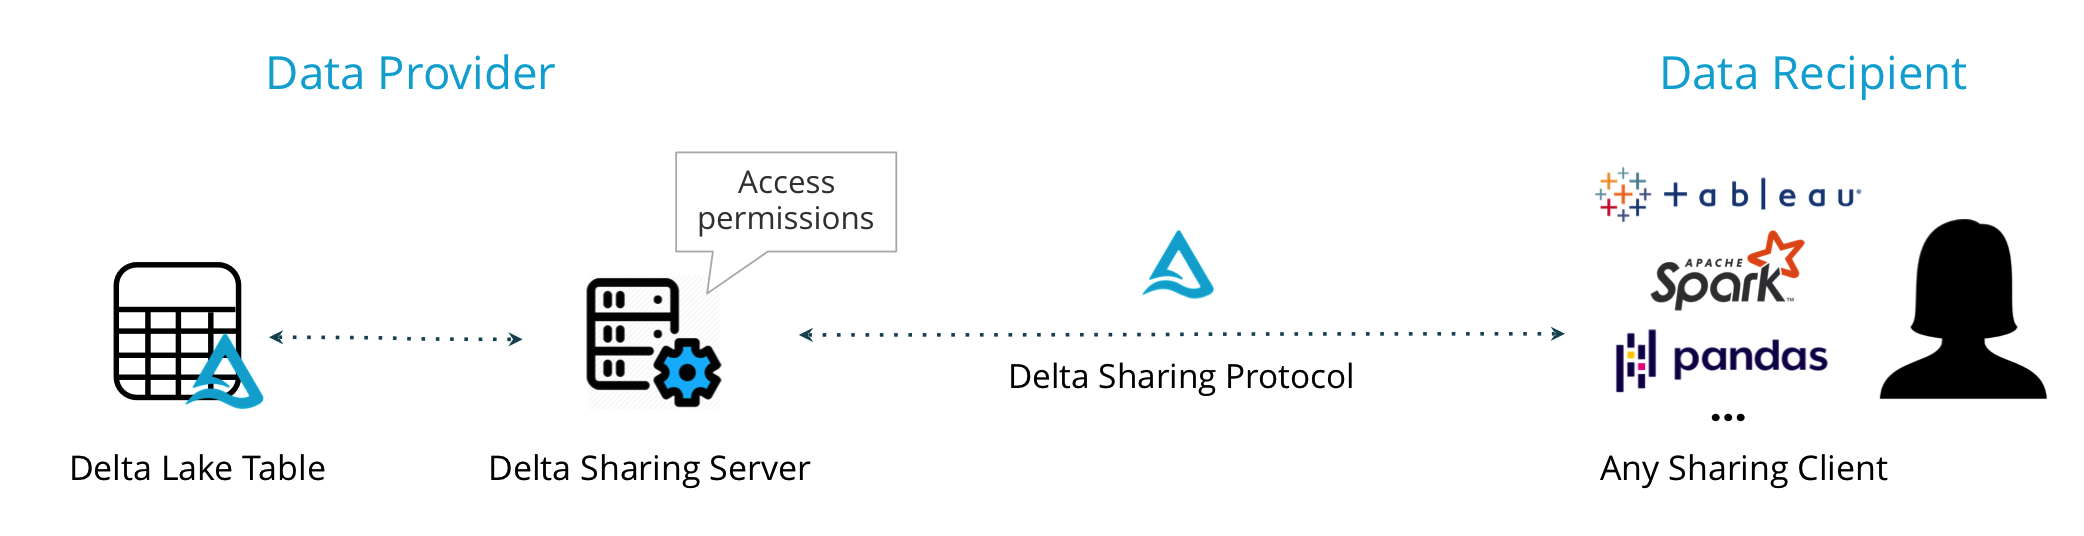

In [ ]:
!pip install delta-sharing

     |████████████████████████████████| 119 kB 5.3 MB/s 
     |████████████████████████████████| 1.3 MB 32.6 MB/s 
     |████████████████████████████████| 294 kB 58.7 MB/s 
     |████████████████████████████████| 142 kB 57.6 MB/s 


In [ ]:
import delta_sharing

# Point to the profile file, can be http
profile_file = "https://raw.githubusercontent.com/delta-io/delta-sharing/main/examples/open-datasets.share"

# Create a SharingClient.
client = delta_sharing.SharingClient(profile_file)

# List all shared tables.
print(client.list_all_tables())


[Table(name='COVID_19_NYT', share='delta_sharing', schema='default'), Table(name='boston-housing', share='delta_sharing', schema='default'), Table(name='flight-asa_2008', share='delta_sharing', schema='default'), Table(name='lending_club', share='delta_sharing', schema='default'), Table(name='nyctaxi_2019', share='delta_sharing', schema='default'), Table(name='nyctaxi_2019_part', share='delta_sharing', schema='default'), Table(name='owid-covid-data', share='delta_sharing', schema='default')]


In [ ]:
! wget https://raw.githubusercontent.com/delta-io/delta-sharing/main/examples/open-datasets.share
! cat open-datasets.share

--2021-09-14 11:51:32--  https://raw.githubusercontent.com/delta-io/delta-sharing/main/examples/open-datasets.share
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148 [text/plain]
Saving to: ‘open-datasets.share’

open-datasets.share 100%[===================>]     148  --.-KB/s    in 0s      

2021-09-14 11:51:32 (7.28 MB/s) - ‘open-datasets.share’ saved [148/148]

{
  "shareCredentialsVersion": 1,
  "endpoint": "https://sharing.delta.io/delta-sharing/",
  "bearerToken": "faaie590d541265bcab1f2de9813274bf233"
}

In [ ]:
# load data as pandas dataframe (or Spark)
table_url = profile_file + "#delta_sharing.default.owid-covid-data"
data = delta_sharing.load_as_pandas(table_url)

In [ ]:
data[data['iso_code']=='AUS'][0:3]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
20630,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,0.157,0.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
20631,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,0.196,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
20632,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944


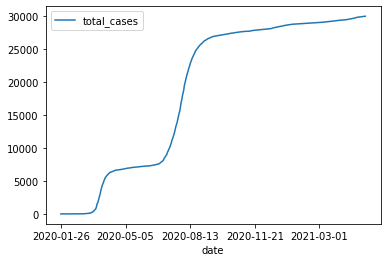

In [ ]:
data[data['iso_code']=='AUS'].plot('date','total_cases')